In [10]:
import sys, os, json
import numpy as np
import pandas as pd
import seaborn as sns
import argparse
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from datetime import datetime

sns.set()


In [3]:
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [8]:
# generate N data points
N = 20

# random data on the x axis in (-5, +5)
# randowm returns floats in [0-1]
x = np.random.random(N) * 10 - 5

# a line plus some noise
# true slope = 0.5
# true intercept = 1
# when we use gaussian noise, MSE is the correct loss function
y = 0.5 * x - 1 + np.random.randn(N)

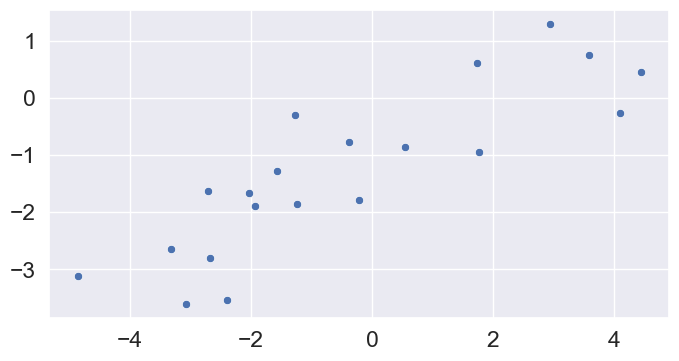

In [9]:
# init fig and axes objects
# plot the data
sns.set(font_scale=1.5)
nrows = 1
ncols = 1
fig_height = nrows * 4
fig_width = ncols * 8
f: Figure
ax: Axes
f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_width, fig_height))
# %% ##################################################################
ax_ = sns.scatterplot(x=x, y=y, ax=ax)

In [11]:
# start the training process
# stuff to store
epochs = 100
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

x = x.reshape(N, 1)
y = y.reshape(N, 1)
inputs = torch.from_numpy(x.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

type(inputs)


torch.Tensor

In [14]:
n_epochs = 100
losses = []

for epoch in range(n_epochs):
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

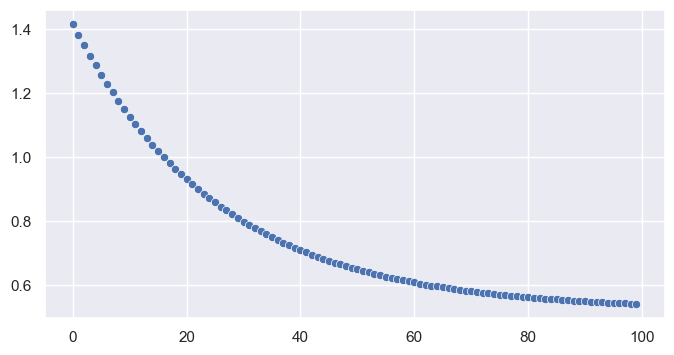

In [15]:
# init fig and axes objects
sns.set(font_scale=1)
nrows = 1
ncols = 1
fig_height = nrows * 4
fig_width = ncols * 8
f: Figure
ax: Axes
f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_width, fig_height))
# %% ##################################################################
ax = sns.scatterplot(x=range(n_epochs), y=losses, ax=ax)